In [1]:
import warnings
import time
warnings.filterwarnings("ignore")
import numpy as np
import re
import pandas as pd    
import scipy.stats as stats
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from matplotlib.font_manager import FontProperties

***
***
**PART A**
***

<u>Solution 1A</u>

In [2]:
normal = pd.read_csv("C:/Users/pri96/OneDrive/Documents/AI and ML PGP/Week 8 to Week 12 - Supervised Learning/Project/Normal.csv")
type_h = pd.read_csv("C:/Users/pri96/OneDrive/Documents/AI and ML PGP/Week 8 to Week 12 - Supervised Learning/Project/Type_H.csv")
type_s = pd.read_csv("C:/Users/pri96/OneDrive/Documents/AI and ML PGP/Week 8 to Week 12 - Supervised Learning/Project/Type_S.csv")

***
<u>Solution 1B</u>

In [3]:
# Print shape and columns of DataFrame 'normal'
print("Normal DataFrame:")
print("Shape:", normal.shape)
print("Columns:", normal.columns.tolist())

# Print shape and columns of DataFrame 'type_s'
print("\nType S DataFrame:")
print("Shape:", type_s.shape)
print("Columns:", type_s.columns.tolist())

# Print shape and columns of DataFrame 'type_h'
print("\nType H DataFrame:")
print("Shape:", type_h.shape)
print("Columns:", type_h.columns.tolist())

Normal DataFrame:
Shape: (100, 7)
Columns: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']

Type S DataFrame:
Shape: (150, 7)
Columns: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']

Type H DataFrame:
Shape: (60, 7)
Columns: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


***
<u>Solution 1C</u>

Comparing the column names of the 3 dataframes - normal, type_s and type_h, we can see that 
 1. All the 3 have same set of columns. It would be good if we can combine all 3 dataframes and work on 1 rather than with 3 different ones
 2. Each of them represent medical measurements of different biomechanics features of the patients according to their current conditions
 3. Additionally, all these have a common column, Class, which indicates whether the measurements are normal or are of any type depending on merasurement and orientation of the condition to their body parts

***
<u>Solution 1D</u>

In [4]:
# Printing Data Types
print("Data Types of 'normal' DataFrame:")
print(normal.dtypes)
print("\nData Types of 'type_s' DataFrame:")
print(type_s.dtypes)
print("\nData Types of 'type_h' DataFrame:")
print(type_h.dtypes)

Data Types of 'normal' DataFrame:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of 'type_s' DataFrame:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of 'type_h' DataFrame:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


***
<u>Solution 1E</u>

All 3 dataframes have a single class type in the 'Class' column, with 'Normal' in the first DataFrame, 'Type_S' in the second DataFrame, and 'Type_H' in the third DataFrame. However, all of them have some or the other discrepancy in terms of the way the Class is written, example: normal dataframe has "Normal" and "Nrmal" both variations

Let's see unique values for Class column in all 3 dataframes

In [5]:
# Unique values for 'Class' column in each DataFrame
unique_values_normal = normal['Class'].unique()
unique_values_type_s = type_s['Class'].unique()
unique_values_type_h = type_h['Class'].unique()

print("Unique values in 'Class' column for Normal DataFrame:", unique_values_normal)
print("Unique values in 'Class' column for Type_S DataFrame:", unique_values_type_s)
print("Unique values in 'Class' column for Type_H DataFrame:", unique_values_type_h)

Unique values in 'Class' column for Normal DataFrame: ['Normal' 'Nrmal']
Unique values in 'Class' column for Type_S DataFrame: ['Type_S' 'tp_s']
Unique values in 'Class' column for Type_H DataFrame: ['Type_H' 'type_h']


***
<u>Solution 2A</u>

In [6]:
normal['Class'] = normal['Class'].str.replace('Nrmal', 'Normal')
type_s['Class'] = type_s['Class'].str.replace('tp_s', 'Type_S')
type_h['Class'] = type_h['Class'].str.replace('type_h', 'Type_H')

In [7]:
# Unique values for 'Class' column in each DataFrame
unique_values_normal = normal['Class'].unique()
unique_values_type_s = type_s['Class'].unique()
unique_values_type_h = type_h['Class'].unique()

print("Unique values in 'Class' column for Normal DataFrame:", unique_values_normal)
print("Unique values in 'Class' column for Type_S DataFrame:", unique_values_type_s)
print("Unique values in 'Class' column for Type_H DataFrame:", unique_values_type_h)

Unique values in 'Class' column for Normal DataFrame: ['Normal']
Unique values in 'Class' column for Type_S DataFrame: ['Type_S']
Unique values in 'Class' column for Type_H DataFrame: ['Type_H']


***
<u>Solution 2B</u>

In [8]:
medical = pd.concat([normal, type_s, type_h], axis = 0, ignore_index = True)

In [9]:
medical.shape

(310, 7)

***
<u>Solution 2C</u>

In [10]:
medical.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
165,48.060626,5.687032,57.057161,42.373594,95.443757,32.835877,Type_S
125,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,Type_S
131,70.952728,20.159931,62.859109,50.792797,116.177932,32.522331,Type_S
248,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
29,56.447026,19.444499,43.577846,37.002527,139.189690,-1.859689,Normal


***
<u>Solution 2D</u>

In [11]:
null_percentage = (medical.isnull().sum() / len(medical)) * 100
print("Feature-wise percentage of Null values:\n")
print(null_percentage)

Feature-wise percentage of Null values:

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


There are no null values in any feature

***
<u>Solution 2E</u>

In [12]:
print("5-point summary of the DataFrame:\n")
medical.describe(include='all').T

5-point summary of the DataFrame:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P_incidence,310.0,NaN,NaN,NaN,60.496653,17.23652,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,NaN,NaN,NaN,17.542822,10.00833,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,NaN,NaN,NaN,51.93093,18.554064,14.0,37.0,49.562398,63.0,125.742385
S_slope,310.0,NaN,NaN,NaN,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,NaN,NaN,NaN,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,NaN,NaN,NaN,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
Class,310,3,Type_S,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
<u>Solution 3A</u>

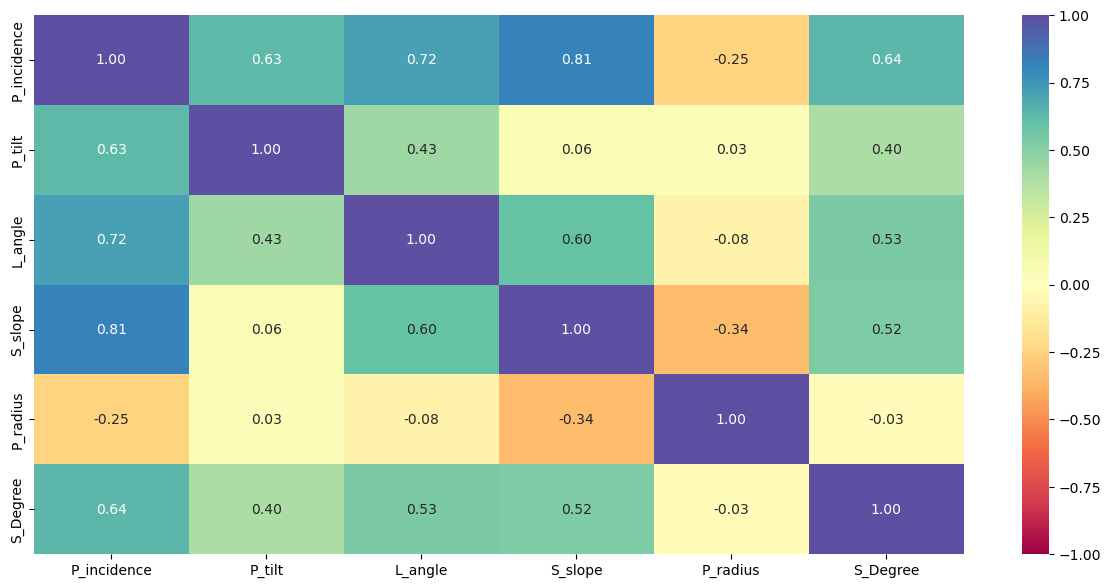

In [13]:
numerical_vars = medical.select_dtypes(include = ['float64']).columns
# Heatmap for correlation matrix
corr_matrix = medical[numerical_vars].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.show()

Few points from above heat map:
 - P_tilt and S_slope indicates almost no linear relationship between them. Same goes with P_tilt and P_radius 
 - P_tilt and L_angle have a linear relation however it is not as strong as other pairs
 - P_incidence and S_slope have a good linear relationshoip with both increasing together
 - P_radius with S_slope suggest an inverse relationship where one feature decreases as the other increases

***
<u>Solution 3B</u>

 A. Features having stronger correlation with correlation value
  1. S_slope and P_incidence have the highest correlation among all with a positive correlation of 0.81
  2. Another 2 features having a strong correlation are L_angle and P_incidence with a positive correlation of 0.72
  3. P-incidence and P-Tilt also have a good positive correlation of 0.63
  
 B. Features having weaker correlation with correlation value
  1. With a negative correlation of 0.03, S_Degree and P_radius have the weakest correlation
  2. L_angle and P_radius are the next in line having a weak correlation of -0.08
  3. Another 2 features having a weak correlation are P_radius and P-incidence with a negative correlation of -0.25
  4. S-slope and P-radius also have a negative correlation of -0.34. They also have a strongest negative correlation
  5. Though not in negative, however, P-tilt and S_slope also have a weaker correlation of 0.06 when compared to others

***
<u>Solution 3C</u>

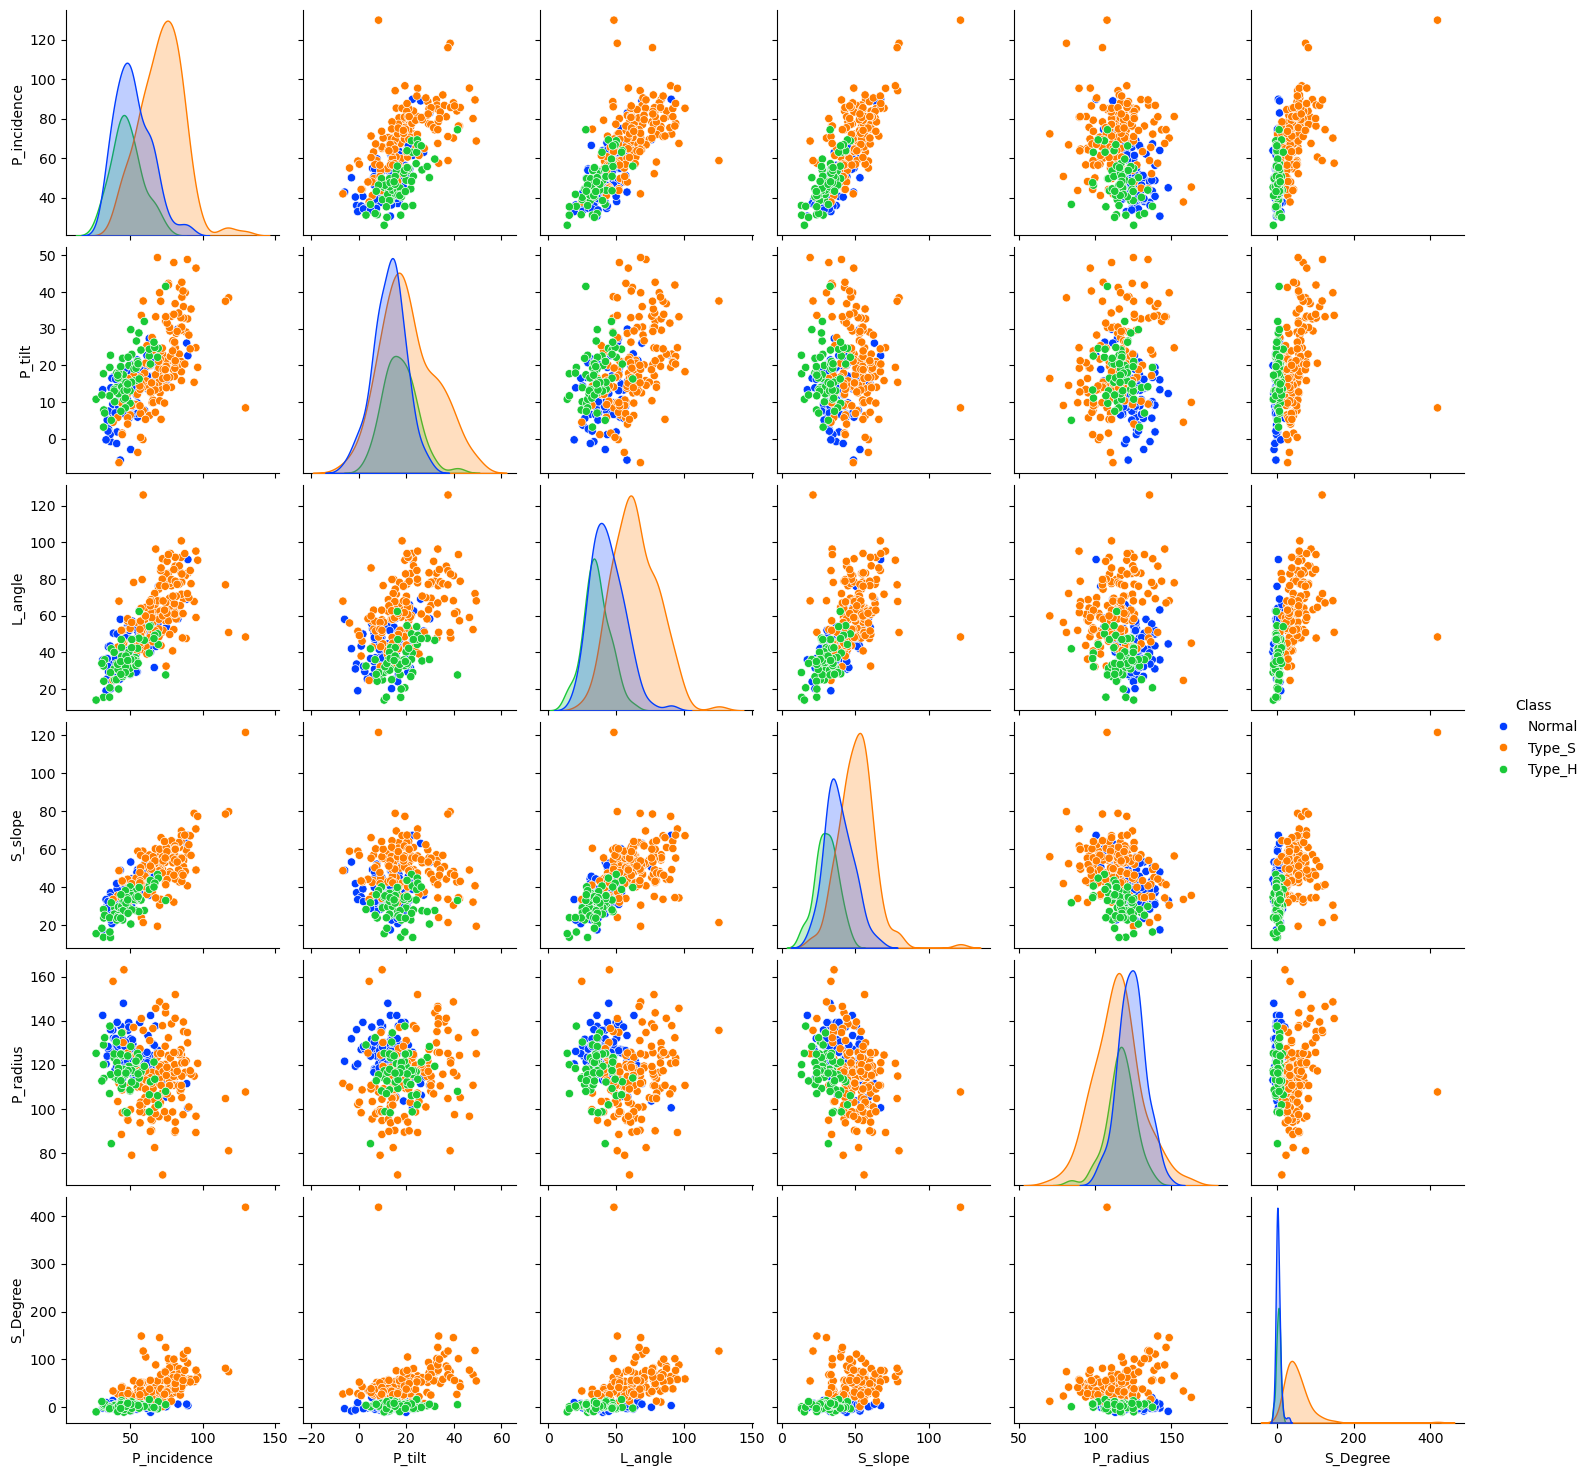

In [14]:
# Visualize a pairplot with 3 classes distinguished by colors and share insights
sns.pairplot(medical, hue = 'Class', palette = 'bright')
plt.show()

Insights:
 1. Seeing the pair plot it can be clearly seen that 'Normal' Class is more clustered and less spread across most of the features
 2. 'Type_S' has a good and wider spread whereas 'Type_H' shows a lesser spread and is more of overlapping with other two Classes
 3. As we have also seen in the heatmap in previous instance, 'P_incidence' shows a positive correlation with most of the features, 'P_tilt', 'L_angle' and 'S_slope', across all classes
 4. We also see that 'Type_S' Classes tend to have a higher 'P_incidence' value as compared to 'Normal' and 'Type_H' Class
 5. Also, few features like 'P_tilt', 'L_angle', 'S_slope' and 'P_radius' have a linear relationship with each other
 6. Taking about the feature plots with themselves, i.e., the density plot, we also see that 'Type_S' is having a broader distribution than others
 7. We can also see a few outliers indicating there are few values which are out of the line and require a revisit. However, according to me, these are very less in number and are majorly seen for 'S_Degree' feature for 'Type_S' class  with some instances having very high values (around 400). This is not observed in the 'Normal' and 'Type_H' CLasses for the same feature, indicating that 'S_Degree' might be a key differenciating feature for 'Type_S'

***
<u>Solution 3D</u>

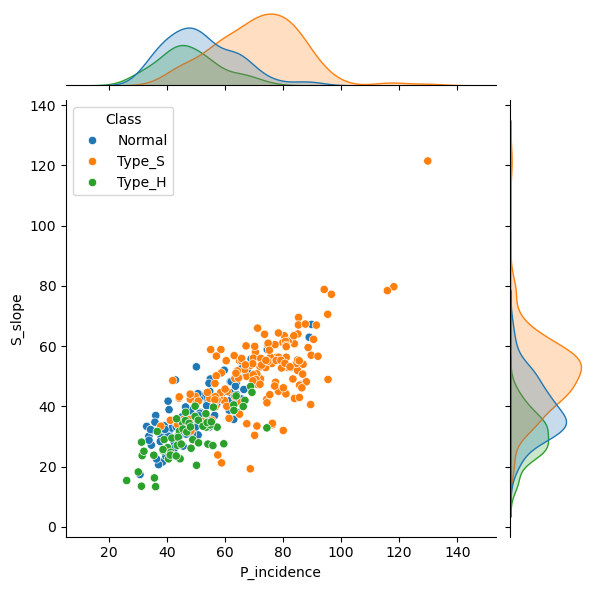

In [15]:
# Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights
sns.jointplot(x = 'P_incidence', y = 'S_slope', data = medical, hue = 'Class', kind = 'scatter')
plt.show()

Insights:
 1. Positive Correlation:
     * The scatter plot shows a positive correlation between P_incidence and S_slope across all classes. 
     * As P_incidence rises, there is a tendency for S_slope to increase as well.
     * This observed relationship aligns with the correlation coefficient of 0.81 identified in the heatmap, signifying a robust linear association
 2. Class Separation:
     * The points for the 'Normal' class are clustered towards the lower end of both P_incidence and S_slope values, indicating lower average values for these features compared to the other classes.
     * The 'Type_S' class points are spread more widely, especially in higher ranges of P_incidence and S_slope
     * The 'Type_H' class points are more tightly clustered compared to 'Type_S', and they are occupying a middle range of values
 3. Outliers:
     * There is an outlier in the 'Type_S' class with a very high P_incidence as well as S_slope value

***
<u>Solution 3E</u>

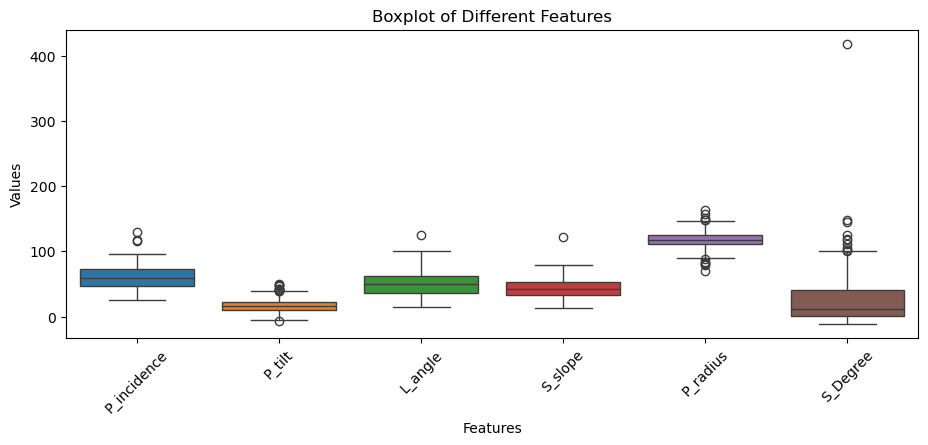

In [16]:
# Creating boxplots for each feature
plt.figure(figsize = (11, 4))
sns.boxplot(data = medical)
plt.title('Boxplot of Different Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation = 45)
plt.show()

Insights:
 1. P_incidences has a higher median value compared to other features, with a large interquartile range (IQR) and some significant outlier
 2. P_tilt has a low median and a small IQR, indicating that its values are concentrated within a narrow range
 3. L_angle and S_slope both have larger medians compared to P_tilt but show more spread in their data, with several outliers
 4. P_radius has a high median and a noticeable spread in values, indicating variability in this feature
 5. S_Degree has a relatively lower median and a small IQR but with several outliers
 6. The presence of outliers in P_incidences, L_angle, S_slope, P_radius, and S_Degree may indicate skewness in the data for these features. P_tilt appears to have a more symmetric distribution as evidenced by the tight clustering of its values around the median
 7. Features with similar medians and spreads (like L_angle and S_slope) are correlated as we have seen above

Overall, the boxplot highlights the diversity in the dataset, showing varying degrees of central tendency, spread, and the presence of outliers across different features.

***
<u>Solution 4A</u>

In [17]:
# Splitting data into features (X) and target variable (y) assuming 'Class' to be the target variable
X = medical.drop('Class', axis = 1)  # All independent variables (i.e., excluding 'Class' feature)
y = medical['Class']  # Target variable
print(X)
print(y)

     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0      38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1      54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2      44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3      48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4      45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910
..           ...        ...        ...        ...         ...       ...
305    47.657730  13.277385  36.679985  34.380345   98.249781  6.273012
306    43.349606   7.467469  28.065483  35.882137  112.776187  5.753277
307    46.855781  15.351514  38.000000  31.504267  116.250917  1.662706
308    43.203185  19.663146  35.000000  23.540039  124.846109 -2.919076
309    48.109236  14.930725  35.564683  33.178512  124.056452  7.947905

[310 rows x 6 columns]
0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
305    Type_H
306    Type_H


***
<u>Solution 4B</u>

In [18]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Checking the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", y_train.shape[0]) # only printing rows as there is only 1 column
print("X_test shape:", X_test.shape)
print("Y_test shape:", y_test.shape[0]) # only printing rows as there is only 1 column

X_train shape: (248, 6)
Y_train shape: 248
X_test shape: (62, 6)
Y_test shape: 62


***
<u>Solution 4C</u>

In [19]:
knn = KNeighborsClassifier(n_neighbors = 5) # considering 5 nearest neighbors when making predictions 
knn

KNeighborsClassifier()

In [20]:
# Call Nearest Neighbour algorithm
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

***
<u>Solution 4D</u>

Performance Metrics include the following:
 1. Accuracy
 2. Confusion Matrix
 3. Precision
 4. Recall
 5. F-Score
 6. Configuration Report

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Precision
precision_train = precision_score(y_train, y_train_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Recall
recall_train = recall_score(y_train, y_train_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# F1 Score
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("Training Set:")
print(f"    Accuracy", format(accuracy_train, ".2f"))
print(f"    Precision", format(precision_train, ".2f"))
print(f"    Recall", format(recall_train, ".2f"))
print(f"    F1 Score", format(f1_train, ".2f"))

print("\nTesting Set:")
print(f"    Accuracy", format(accuracy_test, ".2f"))
print(f"    Precision", format(precision_test, ".2f"))
print(f"    Recall", format(recall_test, ".2f"))
print(f"    F1 Score", format(f1_test, ".2f"))


Training Set:
    Accuracy 0.88
    Precision 0.88
    Recall 0.88
    F1 Score 0.88

Testing Set:
    Accuracy 0.79
    Precision 0.81
    Recall 0.79
    F1 Score 0.79


In [23]:
# Detailed classification report
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Set:
              precision    recall  f1-score   support

      Normal       0.80      0.85      0.82        78
      Type_H       0.77      0.69      0.73        49
      Type_S       0.98      0.98      0.98       121

    accuracy                           0.88       248
   macro avg       0.85      0.84      0.84       248
weighted avg       0.88      0.88      0.88       248


Classification Report for Testing Set:
              precision    recall  f1-score   support

      Normal       0.69      0.82      0.75        22
      Type_H       0.64      0.64      0.64        11
      Type_S       0.96      0.83      0.89        29

    accuracy                           0.79        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.81      0.79      0.79        62



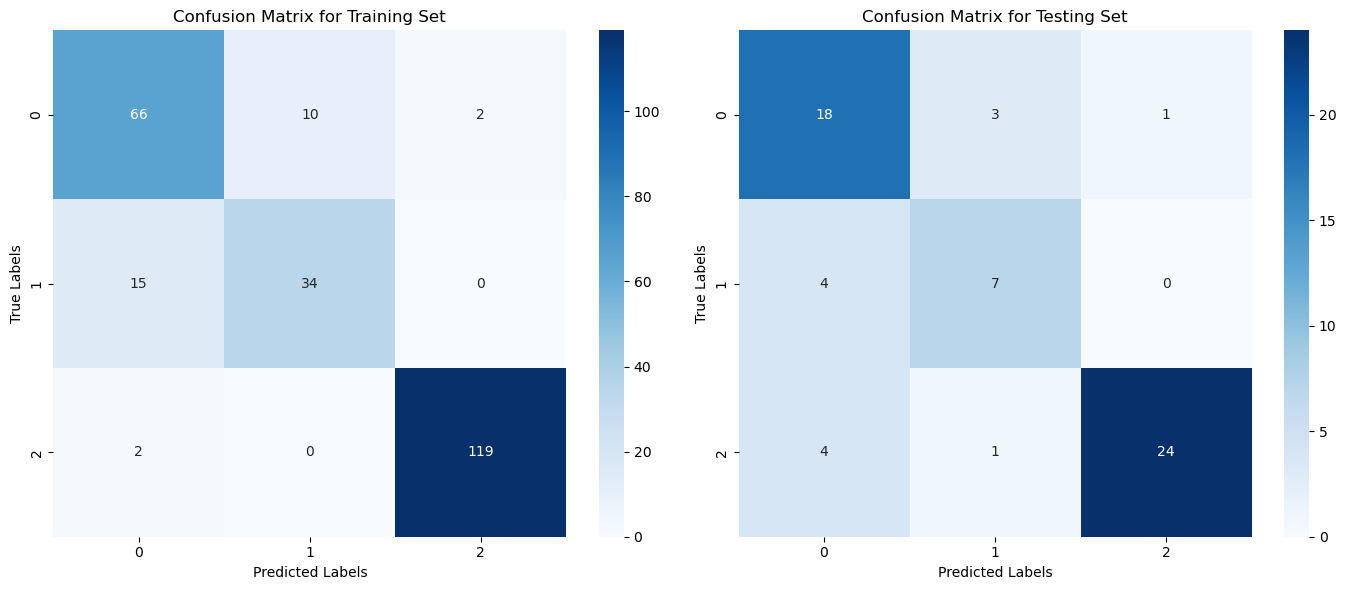

Confusion Matrix for Training Set: [[ 66  10   2]
 [ 15  34   0]
 [  2   0 119]]
Confusion Matrix for Testing Set: [[18  3  1]
 [ 4  7  0]
 [ 4  1 24]]


In [24]:
#Creating the Confusion matrix 

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(conf_matrix_train, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[0])
axes[0].set_title('Confusion Matrix for Training Set')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[1])
axes[1].set_title('Confusion Matrix for Testing Set')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

print("Confusion Matrix for Training Set:", conf_matrix_train)
print("Confusion Matrix for Testing Set:", conf_matrix_test)


AOC cannot be calculated for this set as there are 3 classes and AOC works best for 2 values, i.e., on binary data so it gives an error saying - "ValueError: multiclass format is not supported" indicating that it is not supported here

We have, however, enough parameters to check on other performance parameters which are accuracy, precision, recall, f-score and confusion matrix listed above to evaluate the metrics

***
<u>Solution 5A</u>

As per the ask, we need to experiment on various hyperparameters so we can improve the performance of base model.
For this we would require to do use GridSearch for this 

In [25]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11], # to get the no of neighbours used to determine nearest value
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'] # this is the distance metric to be used
}

# Initializing the KNN classifier
knn_medical = KNeighborsClassifier()

# Performing grid search cross-validation
knn_medical_grid_search = GridSearchCV(estimator = knn_medical, param_grid = param_grid_knn, cv = 5, scoring = 'accuracy', n_jobs=-1)

# Fitting grid search to data
start_time_knn_medical_fit = time.time()
knn_medical_grid_search.fit(X_train, y_train)
end_time_knn_medical_fit = time.time()

# Getting the best parameters
best_params_knn_medical = knn_medical_grid_search.best_params_
print("Best Parameters for KNN:", best_params_knn_medical)

print("KNN Grid Search Tuning Time:", format((end_time_knn_medical_fit - start_time_knn_medical_fit), '.2f'), "seconds")

# Finalize the KNN model with the best parameters
final_knn_medical = knn_medical_grid_search.best_estimator_

print("Final KNN model:", final_knn_medical)

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNN Grid Search Tuning Time: 3.48 seconds
Final KNN model: KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')


***
<u>Solution 5B</u>

In [26]:
final_predictions_test = final_knn_medical.predict(X_test)
final_predictions_train = final_knn_medical.predict(X_train)

# Accuracy
accuracy_final_train = accuracy_score(y_train, final_predictions_train)
accuracy_final_test = accuracy_score(y_test, final_predictions_test)

# Precision
precision_final_train = precision_score(y_train, final_predictions_train, average='weighted')
precision_final_test = precision_score(y_test, final_predictions_test, average='weighted')

# Recall
recall_final_train = recall_score(y_train, final_predictions_train, average='weighted')
recall_final_test = recall_score(y_test, final_predictions_test, average='weighted')

# F1 Score
f1_final_train = f1_score(y_train, final_predictions_train, average='weighted')
f1_final_test = f1_score(y_test, final_predictions_test, average='weighted')

print("Training Set:")
print(f"    Accuracy", format(accuracy_final_train, ".2f"))
print(f"    Precision", format(precision_final_train, ".2f"))
print(f"    Recall", format(recall_final_train, ".2f"))
print(f"    F1 Score", format(f1_final_train, ".2f"))

print("\nTesting Set:")
print(f"    Accuracy", format(accuracy_final_test, ".2f"))
print(f"    Precision", format(precision_final_test, ".2f"))
print(f"    Recall", format(recall_final_test, ".2f"))
print(f"    F1 Score", format(f1_final_test, ".2f"))

Training Set:
    Accuracy 1.00
    Precision 1.00
    Recall 1.00
    F1 Score 1.00

Testing Set:
    Accuracy 0.81
    Precision 0.82
    Recall 0.81
    F1 Score 0.81



Classification Report for Training Set:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        78
      Type_H       1.00      1.00      1.00        49
      Type_S       1.00      1.00      1.00       121

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248


Classification Report for Testing Set:
              precision    recall  f1-score   support

      Normal       0.72      0.82      0.77        22
      Type_H       0.64      0.64      0.64        11
      Type_S       0.96      0.86      0.91        29

    accuracy                           0.81        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.82      0.81      0.81        62



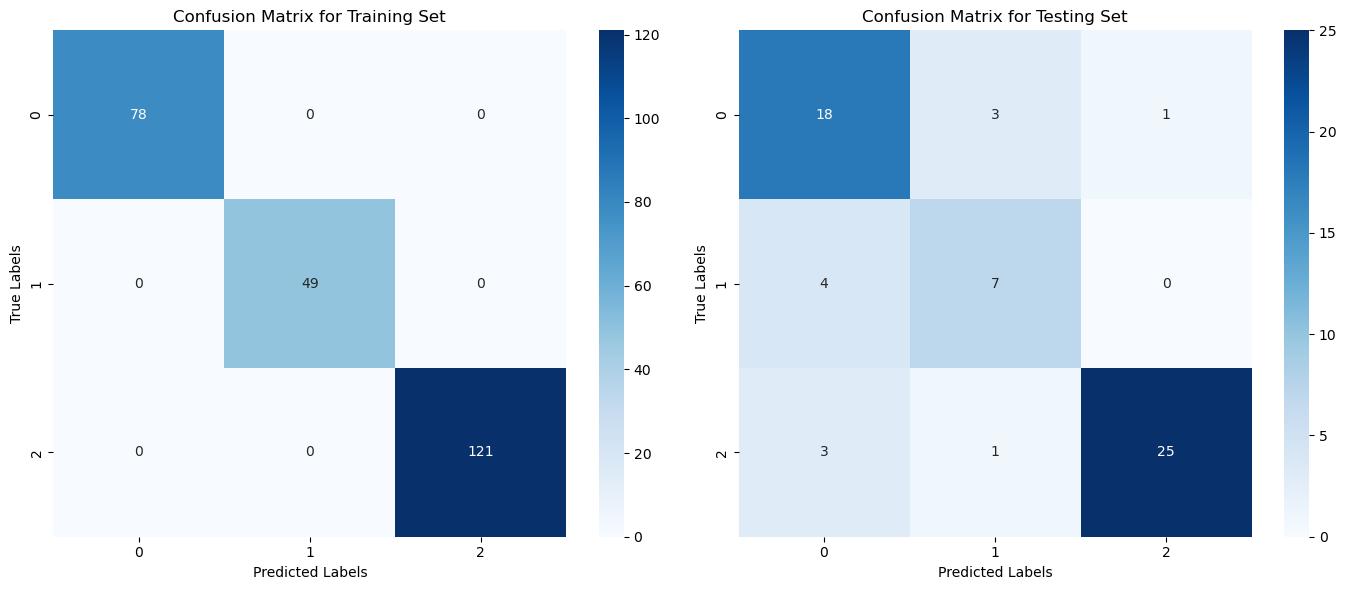

Confusion Matrix for Final Training Set: [[ 78   0   0]
 [  0  49   0]
 [  0   0 121]]
Confusion Matrix for Final Testing Set: [[18  3  1]
 [ 4  7  0]
 [ 3  1 25]]


In [27]:
# Detailed classification report
print("\nClassification Report for Training Set:")
print(classification_report(y_train, final_predictions_train))

print("\nClassification Report for Testing Set:")
print(classification_report(y_test, final_predictions_test))

#Creating the Confusion matrix 

conf_matrix_train = confusion_matrix(y_train, final_predictions_train)
conf_matrix_test = confusion_matrix(y_test, final_predictions_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(conf_matrix_train, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[0])
axes[0].set_title('Confusion Matrix for Training Set')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[1])
axes[1].set_title('Confusion Matrix for Testing Set')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

print("Confusion Matrix for Final Training Set:", conf_matrix_train)
print("Confusion Matrix for Final Testing Set:", conf_matrix_test)

The tuning process resulted in a modest yet significant enhancement in all key performance metrics. The final model shows improved overall performance, particularly on the testing set, suggesting better generalization to new data.

Performance Improvement on Training Data
 - Accuracy: This has improved from .88 to 1, i.e., Improvement: (1.00−0.88)/0.88×100 ≈ 13.64%
 - Precision: This has improved from .88 to 1, i.e., Improvement: (1.00−0.88)/0.88×100 ≈ 13.64%
 - Recall: This has improved from .88 to 1, i.e., Improvement: (1.00−0.88)/0.88×100 ≈ 13.64%
 - F1-Score: This has improved from .88 to 1, i.e., Improvement: (1.00−0.88)/0.88×100 ≈ 13.64%
 - Overall, all parameters have a +13.64% of improvement

Performance Improvement on Test Data
 - Accuracy: This has improved from .79 to .81, i.e., Improvement: (0.81−0.79)/0.79×100≈2.53%
 - Precision: This has improved from .81 to .82, i.e., Improvement: (0.82−0.81)/0.81×100≈1.23%
 - Recall: This has improved from .79 to .81, i.e., Improvement: (0.81−0.79)/0.79×100≈2.53%
 - F1-Score: This has improved from  .79 to .81, i.e., Improvement: (0.81−0.79)/0.79×100≈2.53%
 - Overall, accuracy, recall and f1-score parameters have a +2.53% of improvement and precision has a +1.23% of improvement


***
<u>Solution 5C</u>

The above findings suggest that each parameter played an equally important role in enhancing the model's performance. 
However, the most substantial improvements were observed in accuracy, recall, and F1-score, evident in both the training and test datasets.

***
***
**PART B**
***

***
<u>Solution 1A</u>

In [28]:
data1 = pd.read_csv("C:/Users/pri96/OneDrive/Documents/AI and ML PGP/Week 8 to Week 12 - Supervised Learning/Project/Data1.csv")
data2 = pd.read_csv("C:/Users/pri96/OneDrive/Documents/AI and ML PGP/Week 8 to Week 12 - Supervised Learning/Project/Data2.csv")


In [29]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [30]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


***
<u>Solution 1B</u>

In [31]:
# Dataframe 1

print("DETAILS OF DATAFRAME 1:")

# Printing the shape
print("\nShape:", data2.shape)

# Printing the column names of DataFrame1
print("\nColumn Names:")
print(data1.columns.tolist())

# Printing the data types of each column
print("\nData Types:")
print(data1.dtypes)


# Dataframe 2

print("\n\nDETAILS OF DATAFRAME 2:")

# Printing the shape
print("\nShape:", data2.shape)

# Printing the column names of DataFrame2
print("\nColumn Names:")
print(data2.columns.tolist())

# Printing the data types of each column
print("\nData Types:")
print(data2.dtypes)

DETAILS OF DATAFRAME 1:

Shape: (5000, 7)

Column Names:
['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore', 'MonthlyAverageSpend', 'Level']

Data Types:
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


DETAILS OF DATAFRAME 2:

Shape: (5000, 7)

Column Names:
['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']

Data Types:
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


***
<u>Solution 1C</u>

In [32]:
data = pd.merge(data1, data2, on = 'ID', how = 'inner') # since we have same ID in both dataframes, we can use inner join

In [33]:
data.head(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0


***
<u>Solution 1D</u>

In [34]:
columns = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for column in columns:
    data[column] = data[column].astype(object)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


In [35]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


***
<u>Solution 2A</u>

In [36]:
#data['LoanOnCard'] = data['LoanOnCard'].astype('object')
#data.tail()

We still see that though the datatype is changed to object, the values are still in decimals and not binary. We can change this as well to binary now with below code

In [37]:
# data['LoanOnCard'] = data['LoanOnCard'].astype(int).astype(str).astype('object')
# data['LoanOnCard'] = data['LoanOnCard'].apply(lambda x: f'{x:.0f}').astype('object')
# data.head()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


To visualize the distribution on 'LoanOnCard' feature, we can use bar plot and pie chart both of which will show the variation in the values under 'LoanOnCard' column

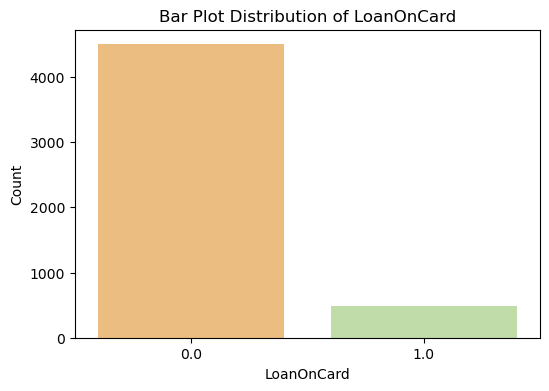

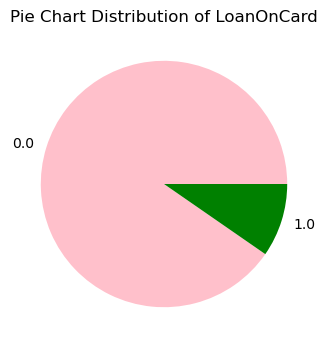

In [39]:
# Bar plot for distribution of LoanOnCard
plt.figure(figsize = (6, 4))
sns.countplot(x = 'LoanOnCard', data = data, palette = 'Spectral')
plt.title('Bar Plot Distribution of LoanOnCard')
plt.xlabel('LoanOnCard')
plt.ylabel('Count')
plt.show()

# Pie chart for distribution of LoanOnCard
loan_on_card_counts = data['LoanOnCard'].value_counts()
plt.figure(figsize = (8,4))
plt.pie(loan_on_card_counts, labels = loan_on_card_counts.index, colors = ['pink', 'green'])
plt.title('Pie Chart Distribution of LoanOnCard')
plt.show()

Insights:
 1. With Bar Plot we can see that there is a significantly higher number of customers who do not have a loan on their credit card compared to those who do
 2. Pie Chart also gives a visualization that majority of customers (a large percentage) do not have a loan on their credit card, while only a small percentage of customers have it
 
 These insights suggest that most of the bank's customers currently do not have a loan on their credit cards. This aligns with the bank's interest in expanding its borrower base. The marketing campaigns can therefore focus on converting the larger segment of non-borrowers to borrowers.

<Axes: xlabel='Security', ylabel='count'>

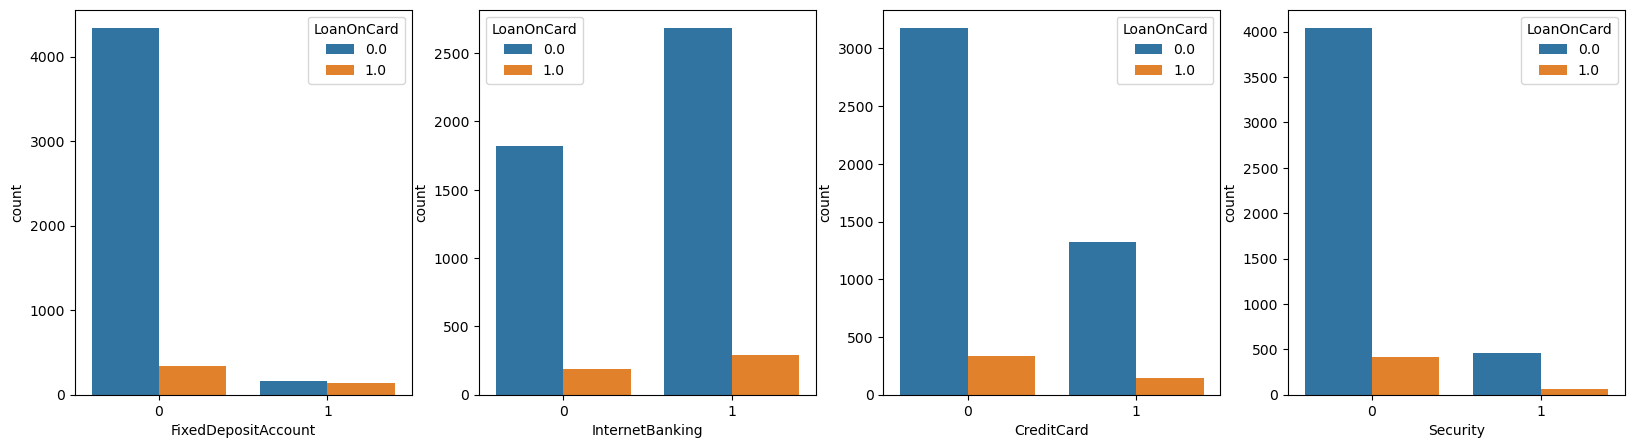

In [40]:
# Plotting various parameters and grouping them with LoanOnCard (target variable) as the grouping factor

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.countplot(x = "FixedDepositAccount", hue = "LoanOnCard", data = data, ax = axes[0])

sns.countplot(x =  'InternetBanking', hue = "LoanOnCard", data = data, ax = axes[1])

sns.countplot(x = 'CreditCard', hue = "LoanOnCard", data = data, ax = axes[2])

sns.countplot(x = 'Security', hue = "LoanOnCard", data = data, ax = axes[3])

# sns.countplot(x = 'Level', hue = "LoanOnCard", data = data, ax = axes[4])

With above count plots, we can deduce below points for LoanOnCard:
 * There are more number of customers without fixed deposits who have loans compared to those with fixed deposits
 * The people who use internet banking tend to have loan on card
 * More number of customers do not own a credit card but have loan
 * Customer who do not have a security deposit in the bank are more likely to have loan on card

***
<u>Solution 2B</u>

In [41]:
# Checking the percentage of missing values 

missing_values_percentage = data.isnull().mean() * 100
missing_values_percentage

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

> **Imputing the missing values**<br>
> Since only 'LoanOncard' has missing values, we will only impute this column now, though we see the datatype of this as 'float64' , we'll still impute it with mode because that would be the best approach to fill all NaN values as there are 2 major values (0 and 1) it also makes sense to impute with mode (with the most frequent value) and fill NaN values as maximum occurred value because this inderectly is a categorical data and we'll be converting the datatype as well in next step as the values in this column are binary i.e. 0 and 1 and so does the explanation of the column say - *"if the customer has a loan on credit card"*

In [42]:
data['LoanOnCard'].fillna(data['LoanOnCard'].mode()[0], inplace = True)
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


In [43]:

# Now we will convert this column dtype to Object as this is a binary column (values 0/1) but the dtype is float64

data['LoanOnCard'] = data['LoanOnCard'].astype(int).astype(object)
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


***
<u>Solution 2C</u>

In [44]:
categorical_columns = data.select_dtypes('object').columns
categorical_columns

Index(['HiddenScore', 'Level', 'Security', 'FixedDepositAccount',
       'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [45]:
for column in categorical_columns:
    print(f"Unique values in {column}: {sorted(data[column].unique())}")

Unique values in HiddenScore: [1, 2, 3, 4]
Unique values in Level: [1, 2, 3]
Unique values in Security: [0, 1]
Unique values in FixedDepositAccount: [0, 1]
Unique values in InternetBanking: [0, 1]
Unique values in CreditCard: [0, 1]
Unique values in LoanOnCard: [0, 1]


As we see above, we fetched all unique values in each categorical column and we couldn't see any unexpected values in any feature. 

 * Columns, 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard' and 'LoanOnCard', are having binary values out of which only 'LoanOnCard' feature had a few blank values which we have already imputed with mode (the most frequent value) as part of (Solution 2.C.). Others only have either 0 or 1 as their values and do not require any imputation
 * Columns , 'HiddenScore' and 'Level', are also categorical data however, those do not have any unexpected values as where the former scores the associated customer, latter ranks the customer on various levels set by the bank. Since both of them are masked by the bank as IPs, we don't see any unexpected values in both the columns which can be imputed with any mean/median/mode values.

> Before moving to next parts there are a few data cleaning steps which we can do to have a more refined dataframe. Let's move ahead:
> 
> We can drop column 'ZipCode' from our dataframe as it won't be necessary to determine where the customer is from for the further classification or prediction of the potential customers to be targetted for campaign

In [46]:
data.drop(columns = 'ZipCode', axis = 1, inplace = True)
data.head()

,ID,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,1,0


In [47]:
# checking duplicate rows

duplicate_rows = data[data.drop(columns = 'ID', axis = 1).duplicated(keep = False)].sort_values(by = list(data.drop(columns = 'ID', axis = 1).columns))
duplicate_rows.shape

(26, 13)

In [48]:
duplicate_rows.head(6)

,ID,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
930,931,28,4,43,3,0.1,2,0,0,0,1,0,0
1026,1027,28,4,43,3,0.1,2,0,0,0,1,0,0
789,790,29,3,31,4,0.3,2,0,0,0,1,0,0
3453,3454,29,3,31,4,0.3,2,0,0,0,1,0,0
590,591,29,3,39,4,2.1,3,0,0,0,1,0,0
799,800,29,3,39,4,2.1,3,0,0,0,1,0,0


> We could also drop the 'ID' column as that also is not of much significance as to what the ID of the customer is however, upon checking for duplicate entries, we can see above that there are a few customers which share the same data across, so, 2 options:
>  1. either we drop 'ID' column and then remove theese duplicates from out dataframe considering them as actual duplicate rows for same customer
>  2. or we consider the exact duplicate rows as coincidences for different customers sharing the same data across and differenciate them with the ID column
>  
> We will be going with the second option and will be keeping all duplicate rows with ID as differenciating factor so will keep the 'ID' column as well in our dataframe **<u>for now</u>**
> 
> *Let's proceed with next parts*

***
<u>Solution 3A</u>

In [49]:
# As per recommendation in the question, dropping 'ID' column. We have already dropped 'ZipCode' as above

data.drop(columns = 'ID', axis = 1, inplace = True)
data.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


In [50]:
# Now as we see in above analysis as part of data cleanup, we only have 13 rows which are duplicates. We can remove those rows

#data[data.duplicated(keep = False)]

data.drop_duplicates(keep = 'first', inplace = True)
data.shape

(4987, 12)

In [51]:
# Splitting data into X and Y

X = data.drop('LoanOnCard',axis = 1)  # All independent variables (i.e., excluding 'LoanOnCard' as that is target variable)
y = data['LoanOnCard'] # Target variable

In [52]:
X.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: LoanOnCard, dtype: object

In [54]:
# Print the shapes of X and y

print("Shape of X:", X.shape)
print("Shape of y:", y.shape[0])

Shape of X: (4987, 11)
Shape of y: 4987


***
<u>Solution 3B</u>

In [55]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape[0])
print("Shape of y_test:", y_test.shape[0])

Shape of X_train: (3740, 11)
Shape of X_test: (1247, 11)
Shape of y_train: 3740
Shape of y_test: 1247


***
<u>Solution 3C</u>

In [56]:
from sklearn.linear_model import LogisticRegression

logic_reg = LogisticRegression(random_state = 42, solver = 'saga', max_iter = 500)
logic_reg

LogisticRegression(max_iter=500, random_state=42, solver='saga')

In [57]:
# Train the model
logic_reg.fit(X_train, pd.to_numeric(y_train)) # since the target variable is of object type, converted it to numeric value

LogisticRegression(max_iter=500, random_state=42, solver='saga')

In [58]:
y_train_pred = logic_reg.predict(X_train)
y_test_pred = logic_reg.predict(X_test)

In [59]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

> Creating a function for confusion matrix so we don't have to add all lines everytime

In [61]:

def plot_confusion_matrix(conf_matrix, cmap='Blues'):
    plt.subplot()
    sns.heatmap(conf_matrix, annot = True, fmt = ".1f")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.xticks(ticks = [0.5, 1.5], labels = ['No loan','Loan'])
    plt.yticks(ticks = [0.5, 1.5], labels = ['No Loan','Loan'])
    plt.show()

> Creating a method for evaluation metrics so we don't have to calculate it each time


In [62]:

def evaluation_metrics(y_true, y_pred, conf_matrix):
    # Compute evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Print evaluation metrics
    print("Accuracy:", format(accuracy, '.3f'))
    print("Recall:", format(recall, '.3f'))
    print("Precision:", format(precision, '.3f'))
    print("F1 Score:", format(f1, '.3f'))
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Plot confusion matrix
    print("\n Confusion Matrix:")
    plot_confusion_matrix(conf_matrix)

***
<u>Solution 3D</u>

Accuracy: 0.928
Recall: 0.409
Precision: 0.681
F1 Score: 0.511

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1132
           1       0.68      0.41      0.51       115

    accuracy                           0.93      1247
   macro avg       0.81      0.69      0.74      1247
weighted avg       0.92      0.93      0.92      1247


 Confusion Matrix:


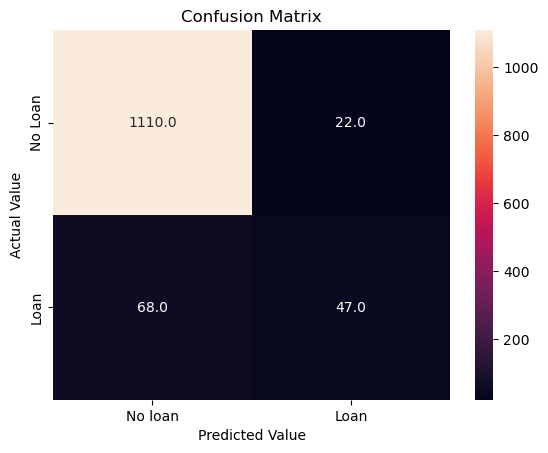

In [63]:
# Calculate evaluation metrics

conf_matrix = confusion_matrix(pd.to_numeric(y_test), pd.to_numeric(y_test_pred))
evaluation_metrics(pd.to_numeric(y_test), pd.to_numeric(y_test_pred), conf_matrix)

Insights:
 * The overall accuracy is 92.8%, showing that it correctly classified about 92.8% of the dataset
 * For the positive class, the recall is 40.9%, indicating that the model identified 40.9% of the actual positive instances, and the precision is 68.1%, meaning that it is correct about 68.1% of the time when predicting a positive instance
 * The F1 score for the positive class is 51.1%, providing a balanced measure of the model's performance based on precision and recall
 * The data shows class imbalance from the confusion matrix, where there are 1132 true negatives and only 115 true positives

While the logistic regression model demonstrates high accuracy overall, it struggles to correctly identify instances of the positive class, as indicated by the relatively low recall and F1 score for positive class. This imbalance in performance suggests that the model may be biased towards predicting the majority class (negative class).

Also, there are several columns in the dataset for which we lack a clear understanding of how each attribute contributes to our model's accuracy. These columns contain masked values, making it difficult to determine the optimal values for our analysis.

***
<u>Solution 3E</u>

Though this concept is not covered yet in any lectures, upon researching, I could see that using SMOTE will lead to a better result and will balance the target variable distribution effectively. 
<br>Tried to use RandomOverSampler and RandomUnderSampler and combining the results, however due to the significant class imbalance in dataframe, there were issues when applying random oversampling and random undersampling.
<br>Hence, used SMOTE instead.
<br>Below are the steps used:

In [64]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Check the distribution of the target variable

unique_classes, class_counts = np.unique(y, return_counts = True)
print("Original class distribution:")
print(dict(zip(unique_classes, class_counts)))
print("Original class distribution Percentage:")
print(format(class_counts[0]*100/(class_counts[0]+class_counts[1]), '.2f'), ":",format(class_counts[1]*100/(class_counts[0]+class_counts[1]), '.2f'))


Original class distribution:
{0: 4507, 1: 480}
Original class distribution Percentage:
90.37 : 9.63


In [65]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with sampling strategy 0.5 to balance classes
smote = SMOTE(sampling_strategy = 0.5, random_state = 42)
smote

SMOTE(random_state=42, sampling_strategy=0.5)

In [66]:
# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, pd.to_numeric(y))

In [67]:
X_resampled.shape, y_resampled.shape[0]

((6760, 11), 6760)

In [68]:
# Check the distribution of the resampled classes

unique_classes_resampled, class_counts_resampled = np.unique(y_resampled, return_counts = True)
print("Resampled class distribution:")
print(dict(zip(unique_classes_resampled, class_counts_resampled)))

Resampled class distribution:
{0: 4507, 1: 2253}


***
<u>Solution 3F</u>

In [69]:
# Split the balanced data into train and test sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [70]:
logic_reg_resampled = LogisticRegression(random_state = 42, solver = 'saga', max_iter = 500)
logic_reg_resampled

LogisticRegression(max_iter=500, random_state=42, solver='saga')

In [71]:
# Train the model on the balanced training data
logic_reg_resampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=500, random_state=42, solver='saga')

In [72]:
# Predict on the test and training data
y_train_pred_resampled = logic_reg_resampled.predict(X_train_resampled)
y_test_pred_resampled = logic_reg_resampled.predict(X_test_resampled)

***
<u>Solution 3G</u>

Accuracy: 0.868
Recall: 0.788
Precision: 0.820
F1 Score: 0.804

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       890
           1       0.82      0.79      0.80       462

    accuracy                           0.87      1352
   macro avg       0.86      0.85      0.85      1352
weighted avg       0.87      0.87      0.87      1352


 Confusion Matrix:


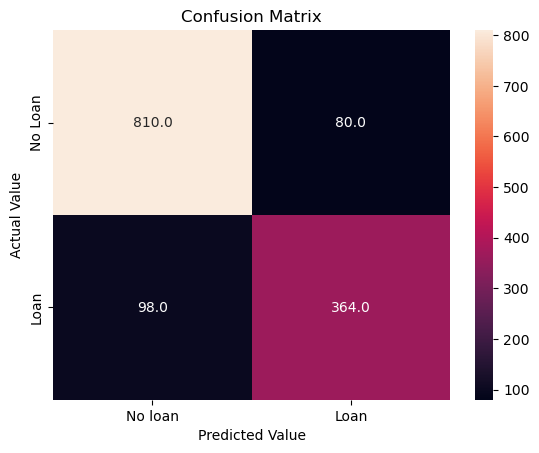

In [73]:
# Calculate evaluation metrics

conf_matrix = confusion_matrix(y_test_resampled, y_test_pred_resampled)
evaluation_metrics(y_test_resampled, y_test_pred_resampled, conf_matrix)

Insights:
 - Accuracy:
     * Before balancing: 0.928, After balancing: 0.868
     * After applying SMOTE to balance the dataset, there is a decline in accuracy. This decline indicates that while SMOTE enhances the model's capability to generalize to the minority class, it also introduces a certain degree of noise or misclassification
 - Recall:
     * Before balancing: 0.409, After balancing: 0.788
     * After applying SMOTE to balance the dataset, there is a notable enhancement in the recall score for the minority class (class 1). This suggests a significant improvement in the model's capacity to accurately detect positive instances (class 1)
 - Precision:
     * Before balancing: 0.681, After balancing: 0.820
     * There is an enhancement in precision as well. This indicates that the model's positive predictions exhibit greater accuracy, thereby reducing the occurrence of false positives
 - F1-Score:
     * Before balancing: 0.511, After balancing: 0.804
     * The F1 score, taking into account precision and recall, exhibits a significant enhancement following SMOTE balancing. This indicates a better balance between the model's ability to correctly classify both classes, which is for good
 - Classification Report:
     * Before balancing: The classification report displays reduced metrics for the minority class (class 1), suggesting a weaker ability to accurately identify positive instances
     * After balancing: The classification report shows improved metrics for both classes, with significant enhancements in recall and precision for the minority class (class 1)
 - Confusion Matrix:
     * Before balancing: The confusion matrix highlights a higher count of false negatives (cases where class 1 is inaccurately labeled as class 0) in contrast to true positives
     * After balancing: The confusion matrix reveals a decrease in false negatives and a rise in true positives, suggesting enhanced accuracy in identifying instances of the minority class


Overall, applying SMOTE to balance the dataset has resulted in significant enhancements in the model's capacity to accurately classify instances of the minority class, as indicated by the elevated recall, precision, and F1 score. However, this enhancement is accompanied by a minor reduction in overall accuracy. We would need to evaluate these compromises and factor in the particular demands of the task when determining the suitable balancing method.


***
<u>Solution 4A</u>

In [74]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(random_state = 42)

# Train SVM model on the balanced training data
svm_model.fit(X_train_resampled, y_train_resampled)


SVC(random_state=42)

In [75]:

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train KNN model on the balanced training data
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

Accuracy: 0.851
Recall: 0.885
Precision: 0.733
F1 Score: 0.802

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       890
           1       0.73      0.89      0.80       462

    accuracy                           0.85      1352
   macro avg       0.83      0.86      0.84      1352
weighted avg       0.86      0.85      0.85      1352


 Confusion Matrix:


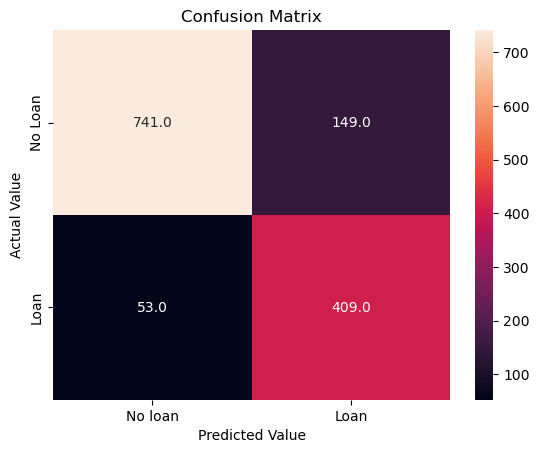

In [76]:
# Predict using SVM model
svm_pred = svm_model.predict(X_test_resampled)

# Print evaluation metrics

svm_conf_matrix = confusion_matrix(y_test_resampled, svm_pred)

evaluation_metrics(y_test_resampled, svm_pred, svm_conf_matrix)

Accuracy: 0.911
Recall: 0.959
Precision: 0.813
F1 Score: 0.880

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       890
           1       0.81      0.96      0.88       462

    accuracy                           0.91      1352
   macro avg       0.89      0.92      0.90      1352
weighted avg       0.92      0.91      0.91      1352


 Confusion Matrix:


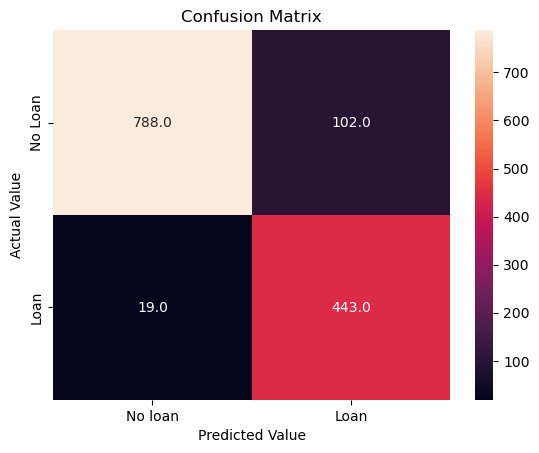

In [77]:
# Predict using KNN model
knn_pred = knn_model.predict(X_test_resampled)

# Print evaluation metrics

knn_conf_matrix = confusion_matrix(y_test_resampled, knn_pred)

evaluation_metrics(y_test_resampled, knn_pred, knn_conf_matrix)

Insights:
 - Accuracy Comparison: 
     * The KNN model has a higher accuracy (91.1%) compared to the SVM model (85.1%), indicating that KNN makes fewer errors overall.
 - Precision and Recall:
    * Precision: KNN has higher precision for class 1 (81.3%) compared to SVM (73.3%), meaning KNN is better at avoiding false positives.
    * Recall: KNN also has higher recall for class 1 (95.9%) compared to SVM (88.5%), meaning KNN is better at identifying true positives.
 - F1 Score: 
     * The F1 score for KNN is higher (88.0%) than for SVM (80.2%), showing that KNN has a better balance between precision and recall.
 - Confusion Matrix:
    * The KNN model has fewer false negatives (19) compared to the SVM model (53), which means KNN is less likely to miss customers who are actually interested.
    * The KNN model also has fewer false positives (102) compared to the SVM model (149), indicating that KNN is less likely to incorrectly predict that a customer is interested.


Conclusion:
 * KNN Model: The KNN model outperforms the SVM model across all major metrics, including accuracy, precision, recall, and F1 score. It excels at correctly identifying both classes, with a notably high recall for class 1.
 * SVM Model: Although the SVM model performs adequately, it is not as effective as the KNN model, especially regarding precision and recall for the positive class. Consequently, it struggles more to accurately identify interested customers without simultaneously raising false positives.
Overall, the KNN model is a better choice for this classification problem based on the provided metrics.

***
<u>Solution 4B</u>

In [78]:
# To tune the models, we can use GridSearch technique to find the best combination of hyperparameters
# for SVM, we can tune - C, Kernel and degree. Also, we will be using Linear and Polynomial kernel for this
# for KNN, we can tune n_neighbors, by performing a grid search over different values of n_neighbors to find the optimal value
# after tuning, we can evaluate the models  and select the one with the best performance metrics

# importing the library
from sklearn.model_selection import GridSearchCV

# SVM Parameter Tuning
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'poly'],
                  'degree': [2, 3, 4]}

# Create the SVM model
svm_model = SVC()

# Creating the GridSearchCV instance

svm_grid_search = GridSearchCV(estimator = svm_model, param_grid = param_grid_svm, cv = 3, n_jobs = -1, scoring = 'accuracy')

# Fitting grid search to data
start_time_svm_fit = time.time()
svm_grid_search.fit(X_train_resampled, y_train_resampled)
end_time_svm_fit = time.time()

# Getting the best parameters
best_params_svm = svm_grid_search.best_params_
print("Best Parameters for SVM:", best_params_svm)

print("SVM Grid Search Tuning Time:", format((end_time_svm_fit - start_time_svm_fit)/60, '.2f'), "minutes")

# Finalize the SVM model with the best parameters
final_svm_model = svm_grid_search.best_estimator_

print("Final SVM model:", final_svm_model)

Best Parameters for SVM: {'C': 100, 'degree': 3, 'kernel': 'poly'}
SVM Grid Search Tuning Time: 4.15 minutes
Final SVM model: SVC(C=100, kernel='poly')


In [79]:
# KNN parameter Tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

# Creating the KNN model
knn_model = KNeighborsClassifier()

# Performing grid search cross-validation
knn_grid_search = GridSearchCV(estimator = knn_model, param_grid = knn_param_grid, cv = 5, scoring = 'accuracy')

# Fitting grid search to data
start_time_knn_fit = time.time()
knn_grid_search.fit(X_train_resampled, y_train_resampled)
end_time_knn_fit = time.time()

# Getting the best parameters
best_params_knn = knn_grid_search.best_params_
print("Best Parameters for KNN:", best_params_knn)

print("KNN Grid Search Tuning Time:", format((end_time_knn_fit - start_time_knn_fit), '.2f'), "seconds")

# Finalize the KNN model with the best parameters
final_knn_model = knn_grid_search.best_estimator_

print("Final KNN model:", final_knn_model)

Best Parameters for KNN: {'n_neighbors': 3}
KNN Grid Search Tuning Time: 0.85 seconds
Final KNN model: KNeighborsClassifier(n_neighbors=3)


In [80]:
# Evaluate SVM model
svm_predictions = final_svm_model.predict(X_test_resampled)
svm_accuracy = accuracy_score(y_test_resampled, svm_predictions)

# Evaluate KNN model
knn_predictions = final_knn_model.predict(X_test_resampled)
knn_accuracy = accuracy_score(y_test_resampled, knn_predictions)

# Choosing the better performing model
if svm_accuracy > knn_accuracy:
    final_model = final_svm_model
    print("Final Model: SVM, Accuracy: ", svm_accuracy)
else:
    final_model = final_knn_model
    print("Final Model: KNN, Accuracy: ", knn_accuracy)

Final Model: SVM, Accuracy:  0.9304733727810651


The finalized model came out to be SVM with an accuracy of 93%

***
<u>Solution 4C</u>

Accuracy: 0.930
Recall: 0.853
Precision: 0.938
F1 Score: 0.893

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       890
           1       0.94      0.85      0.89       462

    accuracy                           0.93      1352
   macro avg       0.93      0.91      0.92      1352
weighted avg       0.93      0.93      0.93      1352


 Confusion Matrix:


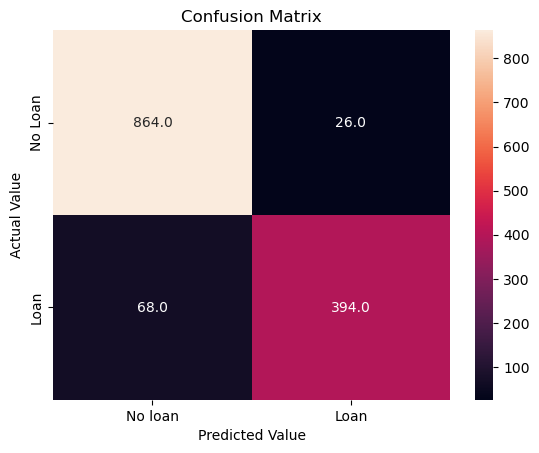

In [81]:
# Predict using KNN model
final_model_pred = final_model.predict(X_test_resampled)

# Print evaluation metrics

final_model_conf_matrix = confusion_matrix(y_test_resampled, final_model_pred)

evaluation_metrics(y_test_resampled, final_model_pred, final_model_conf_matrix)

***
<u>Solution 4D</u>

SVM model acheived as part of Solution 4A will be our base model and the model, which came out to be SVM after tuning, will be out final model. We'll compare both of them and share our insights based on the evaluation metrics:

Insights:
 - Accuracy Improvement:
     * The final model's accuracy increased by about 8% compared to the base model
     * This indicates that the final model is better in accurately classifying both positive and negative instances within the dataset
 - Recall Improvement:
     * Although there was a minor decrease in recall in the final model, it still maintains a high value of 0.853
     * This shows that the final model is able to effectively identify a significant portion of true positive instances compared to the base model, which is still good
 - Precision Improvement:
     * The precision of the final model experienced a significant increase to 0.938
     * This implies that it generates fewer false positive predictions in comparison to the base model
 - F1-Score Improvement:
     * The F1 score, which considers both precision and recall, exhibits a significant enhancement in the final model
     * This indicates overall better performance in terms of both false positives and false negatives
 - Confusion Matrix:
     * The confusion matrix of the final model reveals a reduction in misclassifications compared to the base model, exhibiting fewer false positives (26 versus 149) and false negatives (68 versus 53)
 - Classification Report:
     * The classification report of the final model shows enhancements in precision, accuracy, and F1-score for both classes (0 and 1) when compared to the base model
     * This implies that the final model delivers more balanced and accurate predictions

Overall there is a significant improvement in all evaluation metrics and the final SVM model exhibits exceptional performance across all metrics, highlighting its efficacy in precisely forecasting the target variable when compared to the initial model

***
***
**END OF PROJECT**
***
***